# Dataset Description
See, fork, and run a random forest benchmark model through Kaggle Scripts

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using o ly information available prior to the rental peritotal rentalsd.

er of total rentals

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('bike_sharing.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##
 - datetime의 column의 경우 년-월-시-분-초 로 구성되어 있어 가공이 필요함
 - 문자열 datetime을 datetime형식으로 변화

In [10]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

#datetime의 년/월/일/시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month']= bike_df.datetime.apply(lambda x: x.month)
bike_df['day']= bike_df.datetime.apply(lambda x: x.day)
bike_df['hour']= bike_df.datetime.apply(lambda x: x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


##
- datetime의 년 / 월 / 일 / 시간을 추출 완료.
- casual + registered의 합인 count가 존재 하므로 casual과 registered, datetime은 프레임에서 제거

In [ ]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

##
- 주요 target값인 count(대여 횟수)가 어떻게 분포되어 있는지 시각화 작업

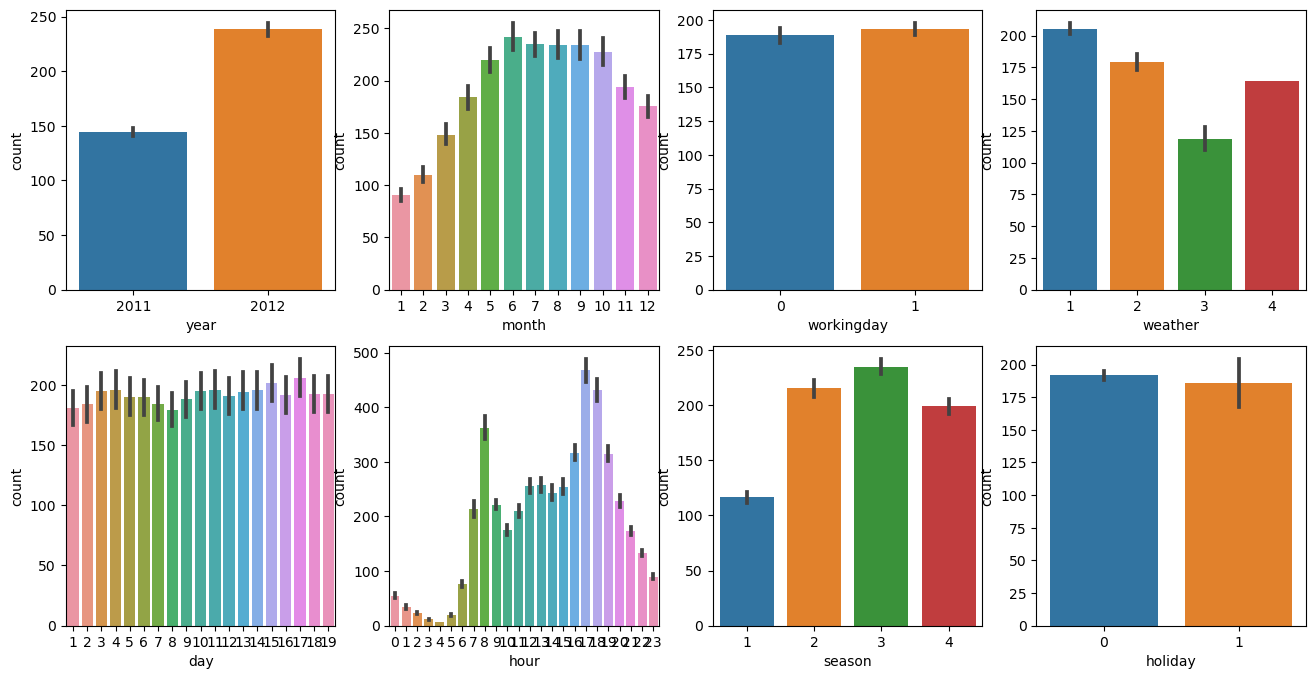

In [26]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month', 'workingday', 'weather', 'day', 'hour', 'season', 'holiday']

for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4

    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE : {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

##
선형 회귀를 활용한 예측 수행

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE: 140.900, MAE: 105.924


##
 - 실제 값과 예측값이 어느 정도 차이가 나는지 DataFrame의 column으로 만들어 오류 값이 가장 큰 순으로 5개만 확인
 - 실제 대여와 예측 대여 자전거 수의 차이가 546 ~ 568대 사이로 큰 오차가 발생하였다.

In [37]:
def get_top_error_data(y_test, pred, n_tops=5):
    #DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측 값을 서로 비교할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    #예측 값과 실제 값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


##
 - 큰 오차가 발생을 왜 하였는지 히스토그램으로 확인 하니 0 ~ 200 사이에 데이터들이 편향적이게 분포 되어있는것을 알수 있었고 이것을 정규 분표 형태로 다시 구성

<Axes: >

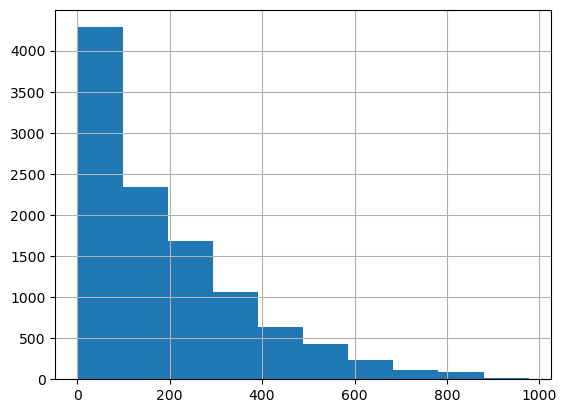

In [38]:
y_target.hist()

##
 - log1p로 타겟 값을 변환 후 원하는 정규분포 형태는 아니지만 변화 전 보다 왜곡도 정도가 많이 향상 되었다.

<Axes: >

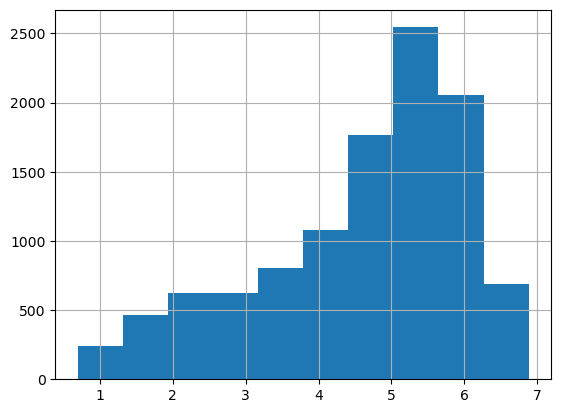

In [39]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

## 
- 향상된 로그 값으로 다시 학습 후 평가를 수행

In [43]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

#테스트 데이터 세트의 target값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

#예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE: 162.594, MAE: 109.286


<Axes: >

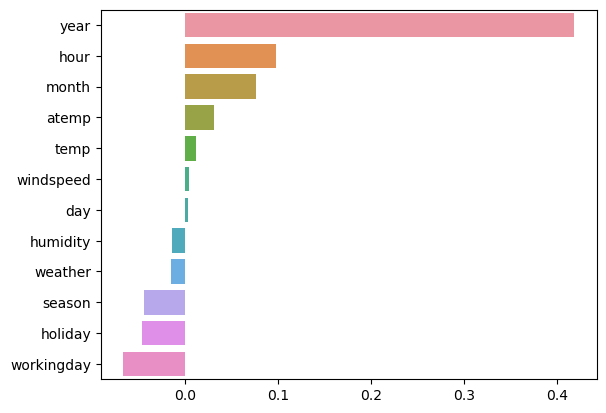

In [46]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

##

 - 판다스에 get_dummies() 함수를 이용하여 ['year', 'month', 'workingday', 'weather', 'day', 'hour', 'season', 'holiday']들을 모두 원 - 핫 인코딩 한 후 다시 예측 성능을 확인

In [47]:
X_features_one_hot = pd.get_dummies(X_features, columns=['year', 'month', 'workingday', 'weather', 'day', 'hour', 'season', 'holiday'])

##
- 사이킷런의 선형 회귀 모델인 LinearReg